In [1]:
import sys
sys.path.append("../")
sys.path.append('C:\Users\James Pino\PycharmProjects\Magine')
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import magine.ontology.enrichment_tools as et
import magine.networks.visualization.notebook_tools as nt
import magine.networks.visualization.notebooks.view as view
from magine.networks.network_subgraphs import NetworkSubgraphs
from exp_data import exp_data
from magine.networks.visualization.igraph_tools import paint_network_overtime


# Exploring network using enrichment analysis

### This example uses the enrichment output we just obtained to explore the network.

First, lets load the molecular network and the enrichment output from the previous runs. 

In [2]:
enrichment_array = pd.read_csv('Data/cisplatin_enrichment.csv.gz', index_col=0)
network = nx.read_gpickle('Data/cisplatin_based_network.p')
subgraph_gen = NetworkSubgraphs(network=network, exp_data=exp_data)

For this example, we will only look at the proteomics data. 

In [3]:
proteomics = et.filter_db(enrichment_array, column='category', options=['proteomics_up'])
proteomics = proteomics[~proteomics['term_name'].isnull()]

In [4]:
print_cols = ['term_name', 'combined_score', 'adj_p_value', 'n_genes', 'rank']

For this example, we just want to look at "biological processes" descriptions, so we will limit our analysis to only databases with this type of information

In [5]:
print(proteomics['db'].unique())

process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'BioCarta_2016',
        'Humancyc_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]

display(proteomics.head(10))
display(proteomics[print_cols].head(10))
# display(et.filter_based_on_words(proteomics[print_cols+['sample_id']], ['repair']))

['KEGG_2016' 'NCI-Nature_2016' 'Panther_2016' 'WikiPathways_2016'
 'BioCarta_2016' 'Humancyc_2016' 'Reactome_2016' 'KEA_2015'
 'GO_Biological_Process_2017' 'GO_Molecular_Function_2017'
 'GO_Cellular_Component_2017' 'ChEA_2016' 'TRANSFAC_and_JASPAR_PWMs'
 'ENCODE_TF_ChIP-seq_2015' 'Kinase_Perturbations_from_GEO_down'
 'Kinase_Perturbations_from_GEO_up'
 'LINCS_L1000_Kinase_Perturbations_down'
 'LINCS_L1000_Kinase_Perturbations_up'
 'Ligand_Perturbations_from_GEO_down' 'Ligand_Perturbations_from_GEO_up'
 'DrugMatrix' 'Drug_Perturbations_from_GEO_2014']


term_name  \
188172                                       Cell cycle_Homo sapiens_hsa04110   
188173                   Ubiquitin mediated proteolysis_Homo sapiens_hsa04120   
188174                           Fanconi anemia pathway_Homo sapiens_hsa03460   
188175                                Colorectal cancer_Homo sapiens_hsa05210   
188176  Longevity regulating pathway - multiple species_Homo sapiens_hsa04213   
188177                         Chronic myeloid leukemia_Homo sapiens_hsa05220   
188178                                      Spliceosome_Homo sapiens_hsa03040   
188179                       Nucleotide excision repair_Homo sapiens_hsa03420   
188180                               Endometrial cancer_Homo sapiens_hsa05213   
188181                                   Oocyte meiosis_Homo sapiens_hsa04114   

        rank  combined_score  adj_p_value  \
188172     1        14.41309      0.05063   
188173     2        12.28734      0.05290   
188174     3        10.71077      0.13116   
188175     4        10.51834      0.18012   
188176     5        10.14721      0.18012   
188177     6         8.49857      0.20252   
188178     7         8.19675      0.20252   
188179     8         7.57820      0.20252   
188180     9         7.47564      0.25385   
188181    10         6.43965      0.29695   

                                                      genes  n_genes  \
188172     CDC16,CDC20,CDC7,HDAC1,MYC,PLK1,RBL1,SMC1A,YWHAZ        9   
188173  BRCA1,CDC16,CDC20,CUL3,CUL4A,CUL4B,HUWE1,PIAS1,UBA1        9   
188174                          BRCA1,ERCC4,SLX4,TELO2,USP1        5   
188175                             APC,APPL1,BRAF,MAPK3,MYC        5   
188176                       EIF4EBP2,HDAC1,HSPA2,INSR,IRS2        5   
188177                            BRAF,HDAC1,MAPK3,MYC,SHC1        5   
188178          DDX5,HNRNPA1,HNRNPM,HSPA2,PRPF3,SRSF9,THOC2        7   
188179                              CUL4A,CUL4B,ERCC4,ERCC5        4   
188180                                   APC,BRAF,MAPK3,MYC        4   
188181                   CDC16,CDC20,MAPK3,PLK1,SMC1A,YWHAZ        6   

       sample_id       category         db  
188172      01hr  proteomics_up  KEGG_2016  
188173      01hr  proteomics_up  KEGG_2016  
188174      01hr  proteomics_up  KEGG_2016  
188175      01hr  proteomics_up  KEGG_2016  
188176      01hr  proteomics_up  KEGG_2016  
188177      01hr  proteomics_up  KEGG_2016  
188178      01hr  proteomics_up  KEGG_2016  
188179      01hr  proteomics_up  KEGG_2016  
188180      01hr  proteomics_up  KEGG_2016  
188181      01hr  proteomics_up  KEGG_2016

term_name  \
188172                                       Cell cycle_Homo sapiens_hsa04110   
188173                   Ubiquitin mediated proteolysis_Homo sapiens_hsa04120   
188174                           Fanconi anemia pathway_Homo sapiens_hsa03460   
188175                                Colorectal cancer_Homo sapiens_hsa05210   
188176  Longevity regulating pathway - multiple species_Homo sapiens_hsa04213   
188177                         Chronic myeloid leukemia_Homo sapiens_hsa05220   
188178                                      Spliceosome_Homo sapiens_hsa03040   
188179                       Nucleotide excision repair_Homo sapiens_hsa03420   
188180                               Endometrial cancer_Homo sapiens_hsa05213   
188181                                   Oocyte meiosis_Homo sapiens_hsa04114   

        combined_score  adj_p_value  n_genes  rank  
188172        14.41309      0.05063        9     1  
188173        12.28734      0.05290        9     2  
188174        10.71077      0.13116        5     3  
188175        10.51834      0.18012        5     4  
188176        10.14721      0.18012        5     5  
188177         8.49857      0.20252        5     6  
188178         8.19675      0.20252        7     7  
188179         7.57820      0.20252        4     8  
188180         7.47564      0.25385        4     9  
188181         6.43965      0.29695        6    10

In [6]:
time_1_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05,
                                       combined_score=0.0, 
                                       sample_id='01hr', 
                                       db=process_dbs,
                                      )
display(time_1_hour_prot[print_cols].sort_values('rank').head(15))

term_name  \
189887                                                  negative regulation of transcription, DNA-templated   
189000                                                                Cell Cycle_Homo sapiens_R-HSA-1640170   
188379  Validated targets of C-MYC transcriptional repression_Homo sapiens_6bbdafa6-6196-11e5-8ac5-06603...   
188581        XPodNet - protein-protein interactions in the podocyte expanded by STRING_Mus musculus_WP2309   
188380                           Regulation of Telomerase_Homo sapiens_4dfe97ca-6195-11e5-8ac5-06603eb7f303   
188582                                                    Retinoblastoma (RB) in Cancer_Homo sapiens_WP2446   
189001                                                    Interleukin-2 signaling_Homo sapiens_R-HSA-451927   
189002                                      Interleukin-3, 5 and GM-CSF signaling_Homo sapiens_R-HSA-512988   
189889                                                    resolution of meiotic recombination intermediates   
188583                                                           EGFR1 Signaling Pathway_Mus musculus_WP572   
188381                   E2F transcription factor network_Homo sapiens_bb4d0fd3-6191-11e5-8ac5-06603eb7f303   
188382                            Notch signaling pathway_Homo sapiens_88f83518-6194-11e5-8ac5-06603eb7f303   
188584                                                                        Cell Cycle_Homo sapiens_WP179   
189003                                                         Cell Cycle, Mitotic_Homo sapiens_R-HSA-69278   
189004                                         Interleukin receptor SHC signaling_Homo sapiens_R-HSA-912526   

        combined_score  adj_p_value  n_genes  rank  
189887        68.26198      0.00160       22     1  
189000        36.50732      0.00027       28     1  
188379        15.36952      0.00957        7     1  
188581        22.46025      0.01109       30     1  
188380        14.71910      0.00957        7     2  
188582        17.16690      0.01763        8     2  
189001        30.22085      0.00159       16     2  
189002        29.30395      0.00159       16     3  
189889        29.55728      0.01649        4     3  
188583        15.61893      0.04176       10     3  
188381        14.33169      0.01007        7     3  
188382        11.23793      0.01690        6     4  
188584        14.70694      0.02988        8     4  
189003        27.72709      0.00159       22     4  
189004        27.24209      0.00159       15     5

Since terms across databases might be redundant ("Interleukin-3, 5 and GM-CSF signaling_Homo sapiens_R-HSA-512988" and "Interleukin receptor SHC signaling_Homo sapiens_R-HSA-912526" have nearly a full overlap of genes), we want to eliminate duplicate terms and focus on the most enriched. For that we use the Jaccard Index. It is implmented in the find_similar_terms function in enrichment_tools (et).

Now we can explore the top hits, which has been slimmed from 89 to 33 terms. Generally this is where the expert knowledge comes in. However, a quick search with each term and search terms of you molecule of interest tend to be useful. 

The first hit is 'negative regulation of transcription', which means that something caused genes not to be transcribed. Cisplatin causes DNA damage, thus negative regulaton of transcription makes sense. So does top hit 2, 'Cell Cycle_Homo sapiens_R-HSA-1640170'. 

A quick search for 'Interleukin-2 signaling' and 'Cisplatin' __[link](https://www.google.com/search?rlz=1C1CHBD_enUS721US721&ei=KzNeWuCxBsfq_AaSgYuYDQ&q=Interleukin-2+signaling+cisplatin&oq=Interleukin-2+signaling+cisplatin&gs_l=psy-ab.3..35i39k1.8097.9052.0.9196.10.10.0.0.0.0.145.897.7j3.10.0....0...1c.1.64.psy-ab..3.2.218....0.TInUjcZY740)__ returns a paper titled "Cisplatin at clinically relevant concentrations enhances interleukin-2 synthesis by human primary blood lymphocytes." __[link](https://www.ncbi.nlm.nih.gov/pubmed/10211553)__


We can link the two together to see how once might regulate the other by looking at the molecular interactions.

## Expected findings

In [7]:
filtered_1hr = et.filter_similar_terms(time_1_hour_prot, threshold=.7)
display(filtered_1hr[print_cols].head(25))

Number of rows went from 89 to 25


term_name  \
189887                                                  negative regulation of transcription, DNA-templated   
189000                                                                Cell Cycle_Homo sapiens_R-HSA-1640170   
189001                                                    Interleukin-2 signaling_Homo sapiens_R-HSA-451927   
189889                                                    resolution of meiotic recombination intermediates   
189008                                                          Signalling by NGF_Homo sapiens_R-HSA-166520   
189893                                                                                  mitotic cytokinesis   
188581        XPodNet - protein-protein interactions in the podocyte expanded by STRING_Mus musculus_WP2309   
189894                                                                                   chloride transport   
189032                                                              Axon guidance_Homo sapiens_R-HSA-422475   
188582                                                    Retinoblastoma (RB) in Cancer_Homo sapiens_WP2446   
188583                                                           EGFR1 Signaling Pathway_Mus musculus_WP572   
188379  Validated targets of C-MYC transcriptional repression_Homo sapiens_6bbdafa6-6196-11e5-8ac5-06603...   
188380                           Regulation of Telomerase_Homo sapiens_4dfe97ca-6195-11e5-8ac5-06603eb7f303   
188584                                                                        Cell Cycle_Homo sapiens_WP179   
189056                  Deactivation of the beta-catenin transactivating complex_Homo sapiens_R-HSA-3769402   
188381                   E2F transcription factor network_Homo sapiens_bb4d0fd3-6191-11e5-8ac5-06603eb7f303   
189059                                                              Immune System_Homo sapiens_R-HSA-168256   
188382                            Notch signaling pathway_Homo sapiens_88f83518-6194-11e5-8ac5-06603eb7f303   
189062                                 SUMO E3 ligases SUMOylate target proteins_Homo sapiens_R-HSA-3108232   
189063                                                                  DNA Repair_Homo sapiens_R-HSA-73894   
189067                                                   Signaling by Rho GTPases_Homo sapiens_R-HSA-194315   
189071                                            Unfolded Protein Response (UPR)_Homo sapiens_R-HSA-381119   
189072                             Processing of Capped Intron-Containing Pre-mRNA_Homo sapiens_R-HSA-72203   
189085                                       Platelet Aggregation (Plug Formation)_Homo sapiens_R-HSA-76009   
189087                                    Apoptotic cleavage of cellular proteins_Homo sapiens_R-HSA-111465   

        combined_score  adj_p_value  n_genes  rank  
189887        68.26198      0.00160       22     1  
189000        36.50732      0.00027       28     1  
189001        30.22085      0.00159       16     2  
189889        29.55728      0.01649        4     3  
189008        25.78307      0.00159       21     9  
189893        24.79824      0.03095        5     7  
188581        22.46025      0.01109       30     1  
189894        22.31045      0.02926        5     8  
189032        20.50960      0.00159       22    33  
188582        17.16690      0.01763        8     2  
188583        15.61893      0.04176       10     3  
188379        15.36952      0.00957        7     1  
188380        14.71910      0.00957        7     2  
188584        14.70694      0.02988        8     4  
189056        14.53132      0.00159        6    57  
188381        14.33169      0.01007        7     3  
189059        12.58844      0.00899       43    60  
188382        11.23793      0.01690        6     4  
189062         9.93208      0.01335        7    63  
189063         9.56920      0.03207       12    64  
189067         8.89983      0.03604       14    68  
189071         8.07694      0.03207        6 

In [8]:
shorten_names = {
    'Cell Cycle_Homo sapiens_R-HSA-1640170':'Cell Cycle',
    'DNA Repair_Homo sapiens_R-HSA-73894' : 'DNA Repair',
                }
rename_all = proteomics.copy()
rename_all['term_name'] = rename_all['term_name'].replace(shorten_names)
dna_and_cellcycle_term, dna_and_cellcycle_mole = nt.create_subnetwork(['Cell Cycle', 'DNA Repair'], rename_all, network, 'entire_network')

('Cell Cycle', 104)
('DNA Repair', 38)
Looking for direct edges


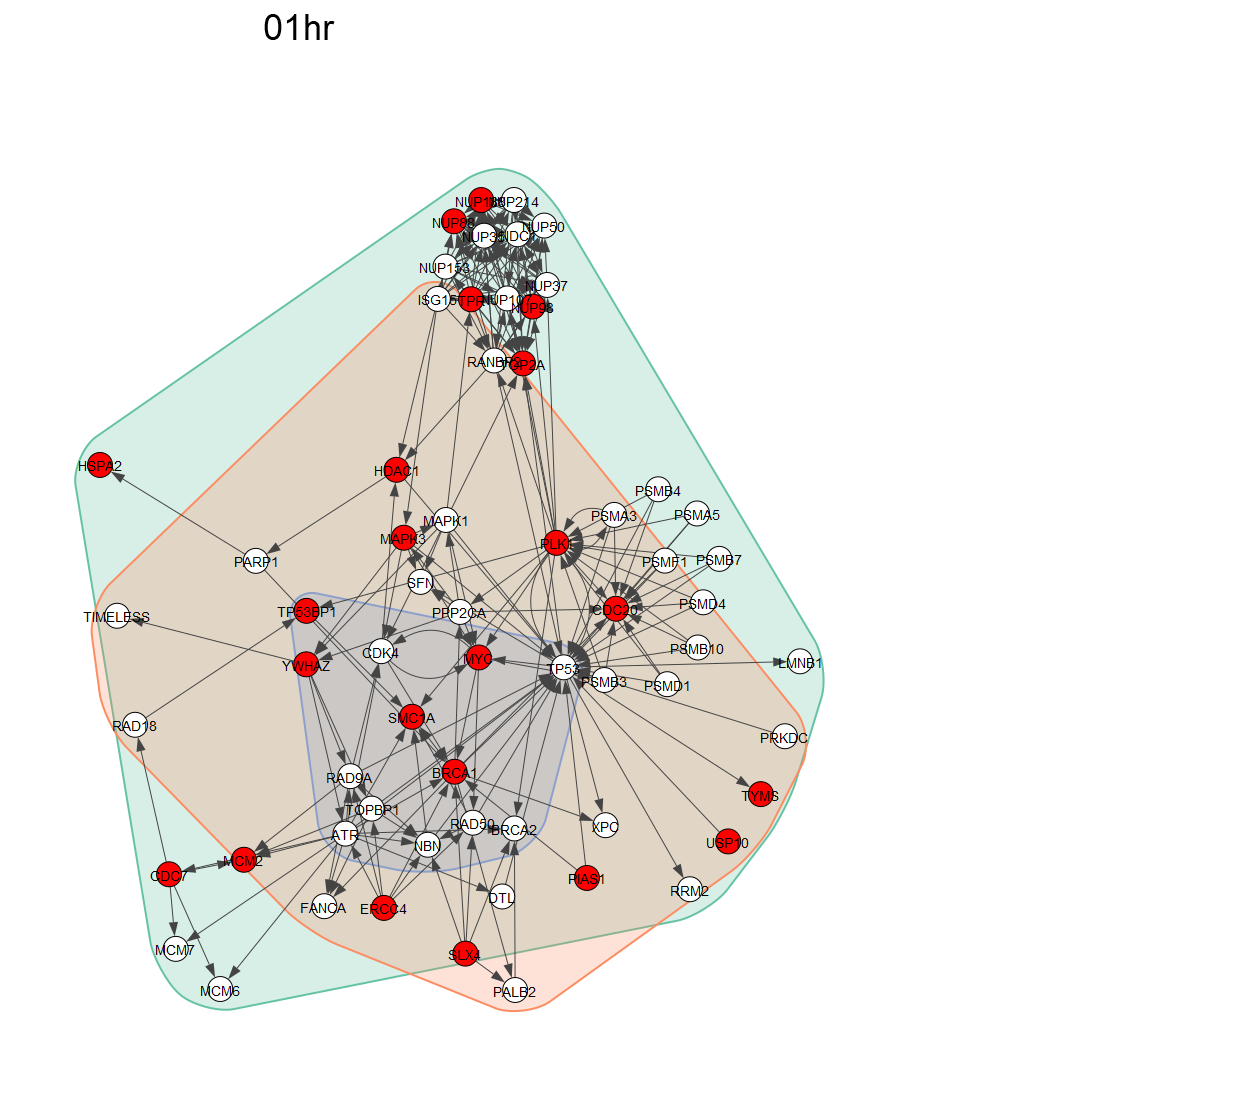

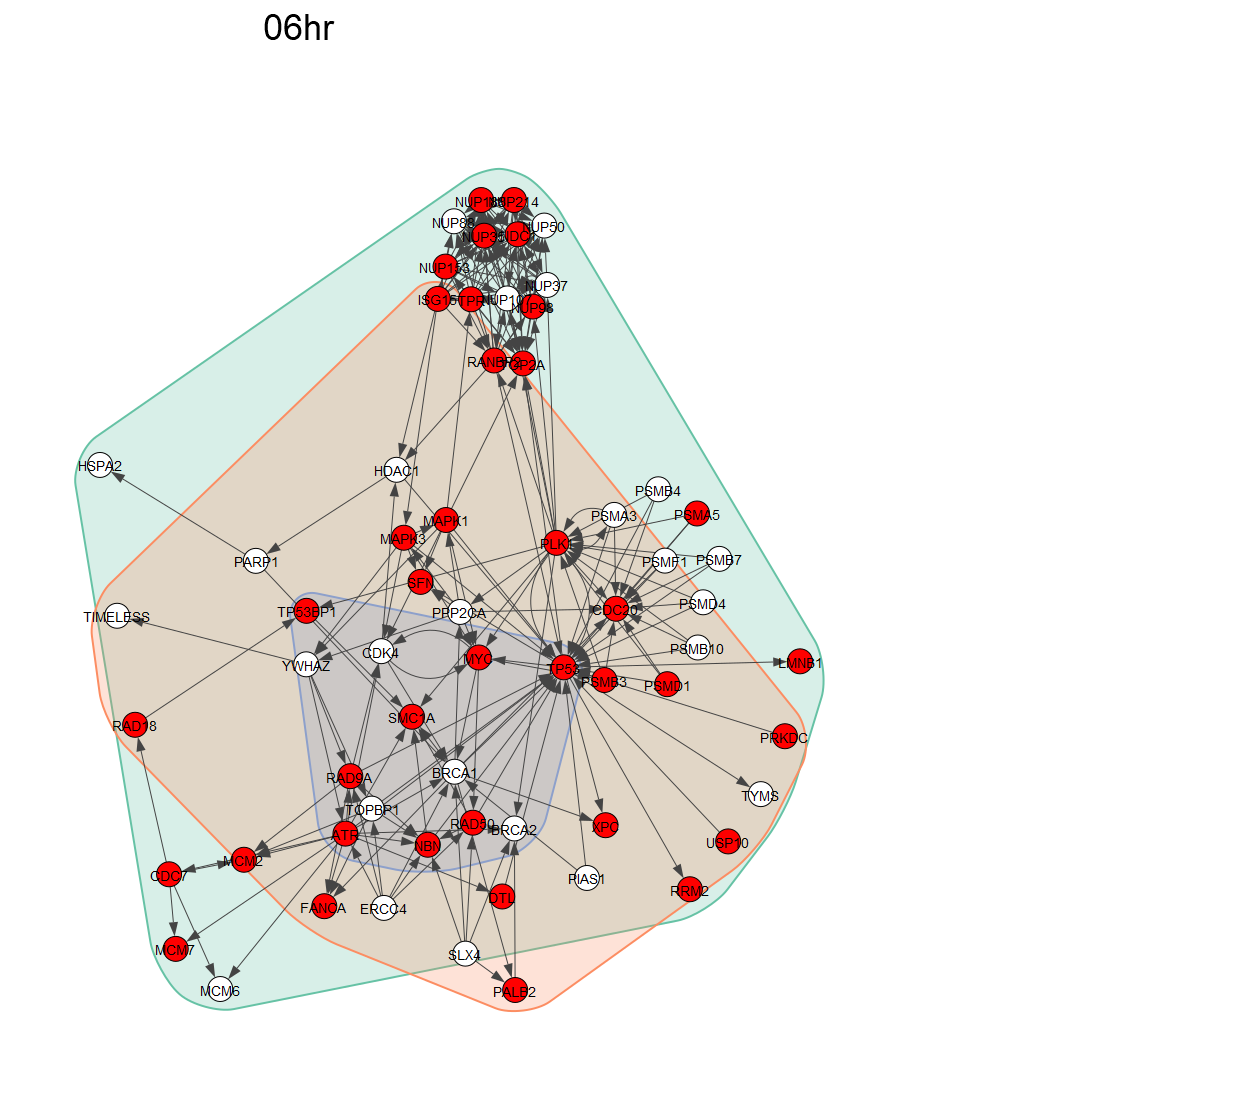

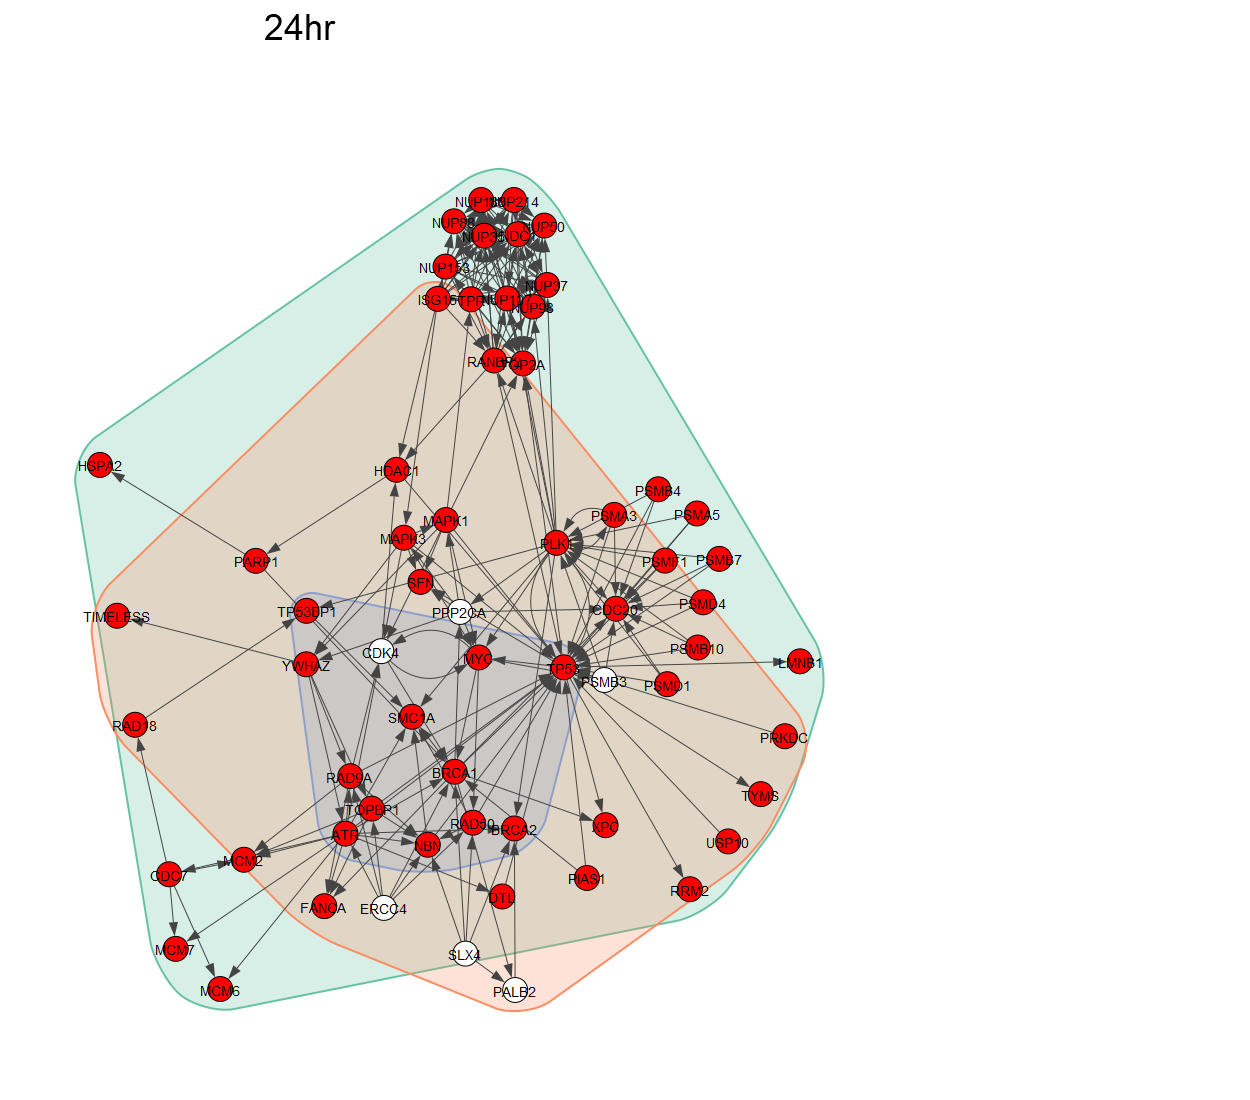

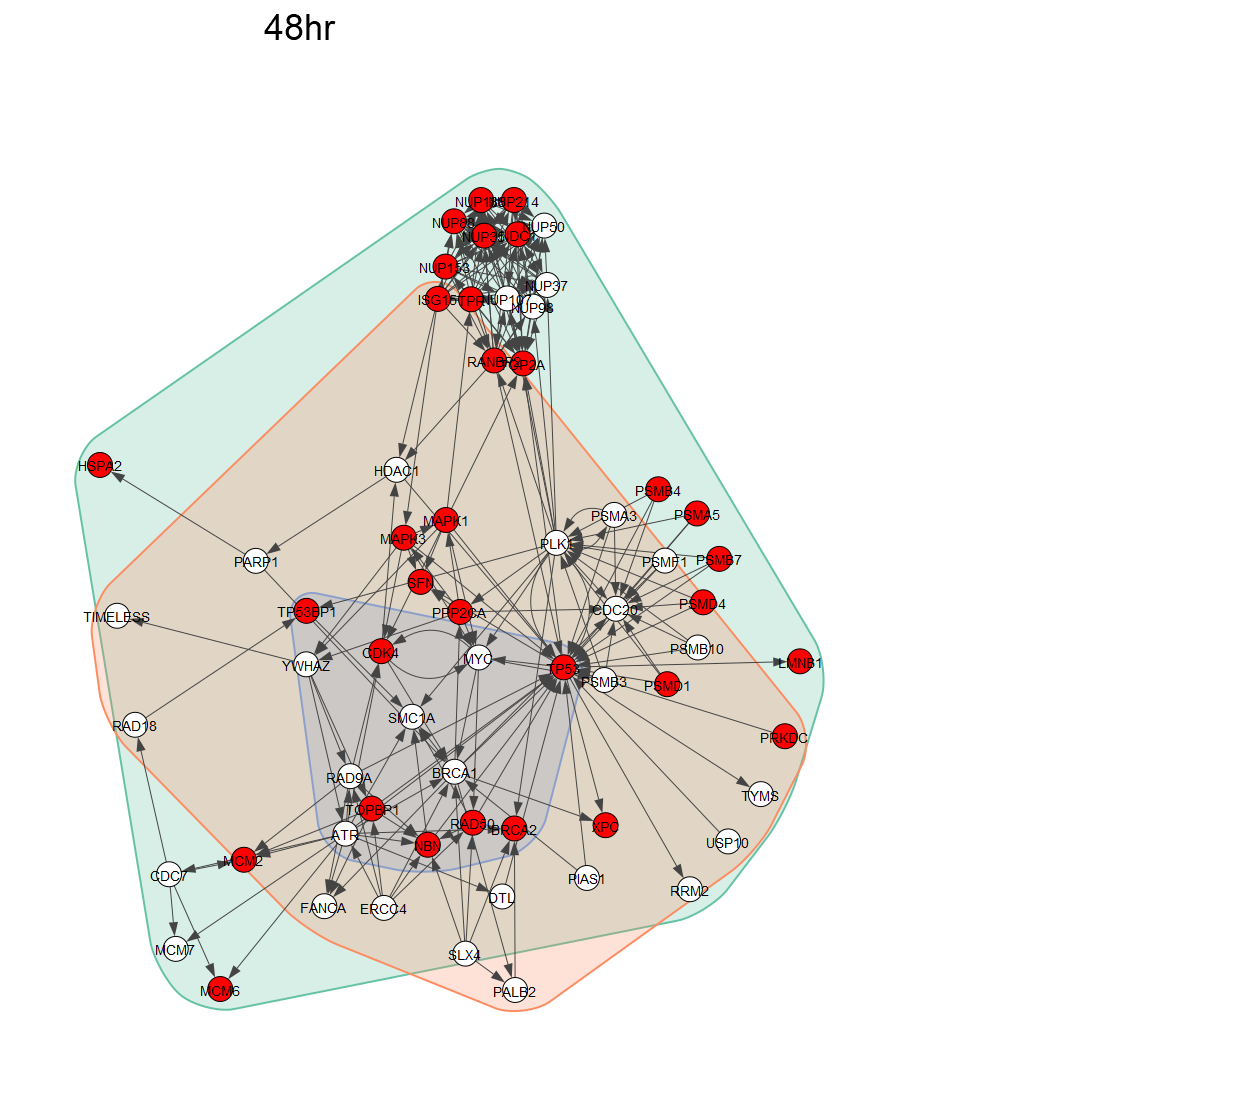

In [9]:

paint_network_overtime(dna_and_cellcycle_mole, exp_data, 'red', 'dna_cell_cycle' )

In [39]:
view.display_graph(dna_and_cellcycle_term)

In [41]:
view.display_graph(dna_and_cellcycle_mole, add_parent=True)

In [10]:
shorten_names = {
    'Cell Cycle_Homo sapiens_R-HSA-1640170':'Cell Cycle',
#     'negative regulation of transcription, DNA-templated': 'Anti-transcription',
    'DNA Repair_Homo sapiens_R-HSA-73894' : 'DNA Repair',
    'Immune System_Homo sapiens_R-HSA-168256': 'Immune response',
#     'Interleukin-2 signaling_Homo sapiens_R-HSA-451927': 'IL2',
#     'resolution of meiotic recombination intermediates': 'Meiotic Recombination', 
#     'E2F transcription factor network_Homo sapiens_bb4d0fd3-6191-11e5-8ac5-06603eb7f303' : 'E2F tfs'
                }
renamed_1hr = filtered_1hr.copy()
renamed_1hr['term_name'] = renamed_1hr['term_name'].replace(shorten_names)
term_net_1, mol_net_1 = nt.create_subnetwork(shorten_names.values(), renamed_1hr, network, '1hr')


('DNA Repair', 12)
('Cell Cycle', 28)
('Immune response', 43)
Looking for direct edges


In [11]:
view.display_graph(term_net_1)

In [12]:
view.display_graph(mol_net_1, add_parent=True)

In [13]:
view.render_graph(dna_and_cellcycle_mole, add_parent=True)

In [14]:
# dna_genes = et.term_to_genes(df=proteomics, term='DNA Repair_Homo sapiens_R-HSA-73894')
dna_genes = et.term_to_genes(df=renamed_1hr, term='DNA Repair')

In [15]:
dna_network = subgraph_gen.shortest_paths_between_lists(
    dna_genes, max_length=3
)

Removing from list


In [16]:
print(len(dna_network.nodes()))

13


In [17]:
view.render_graph(dna_network)

In [18]:
plus_neighbors = subgraph_gen.expand_neighbors(dna_network, nodes=[], down_stream=True, 
                                               expand_all=True,
                                               include_list=exp_data.sig_species_over_time['06hr'])

Removing from list


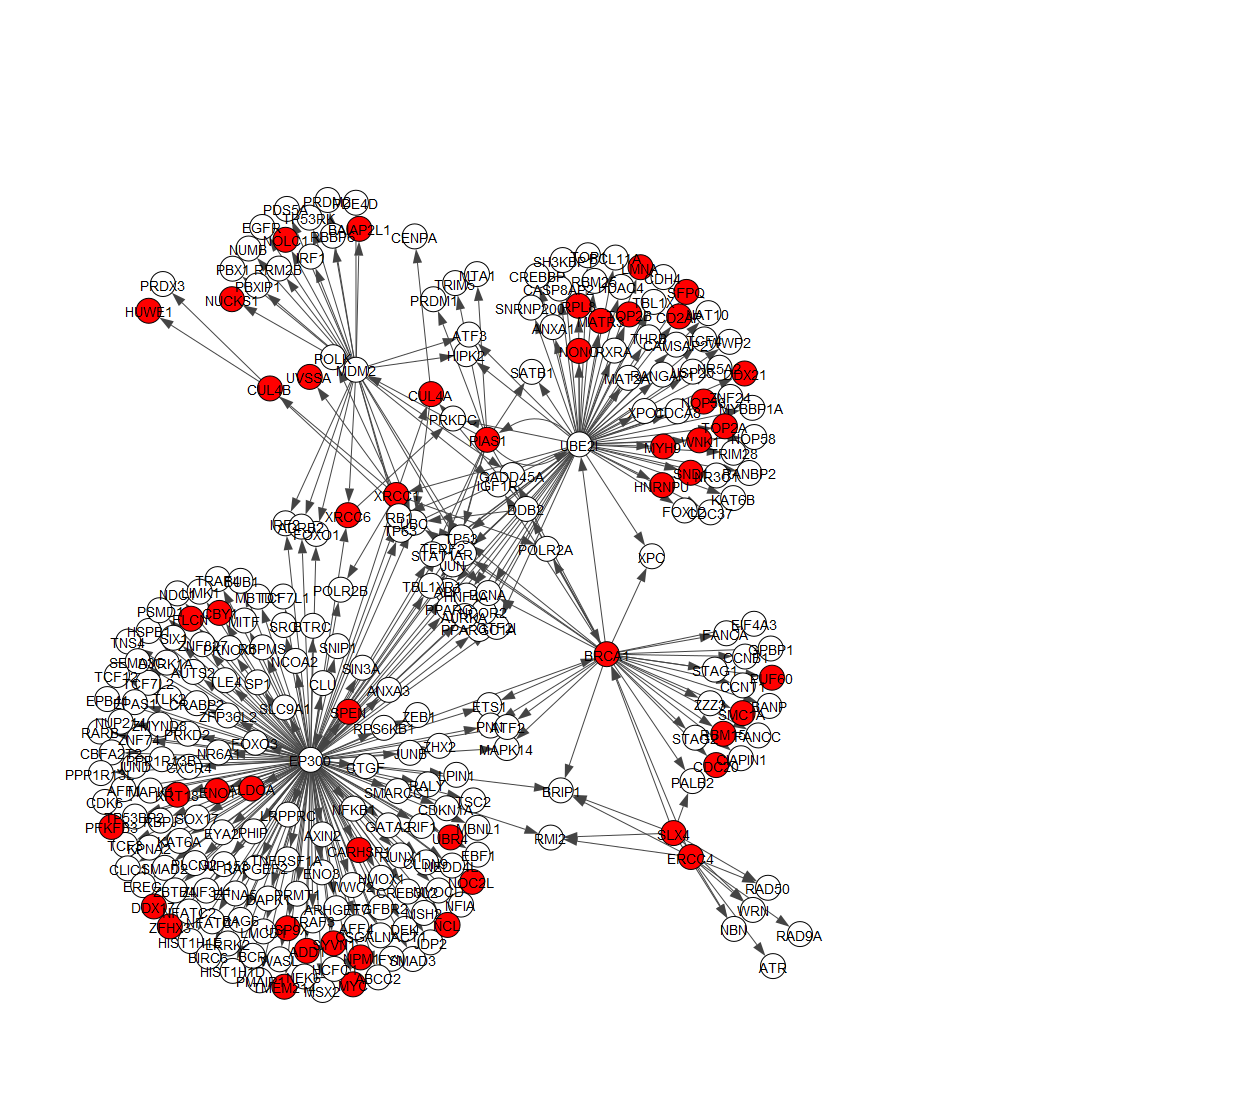

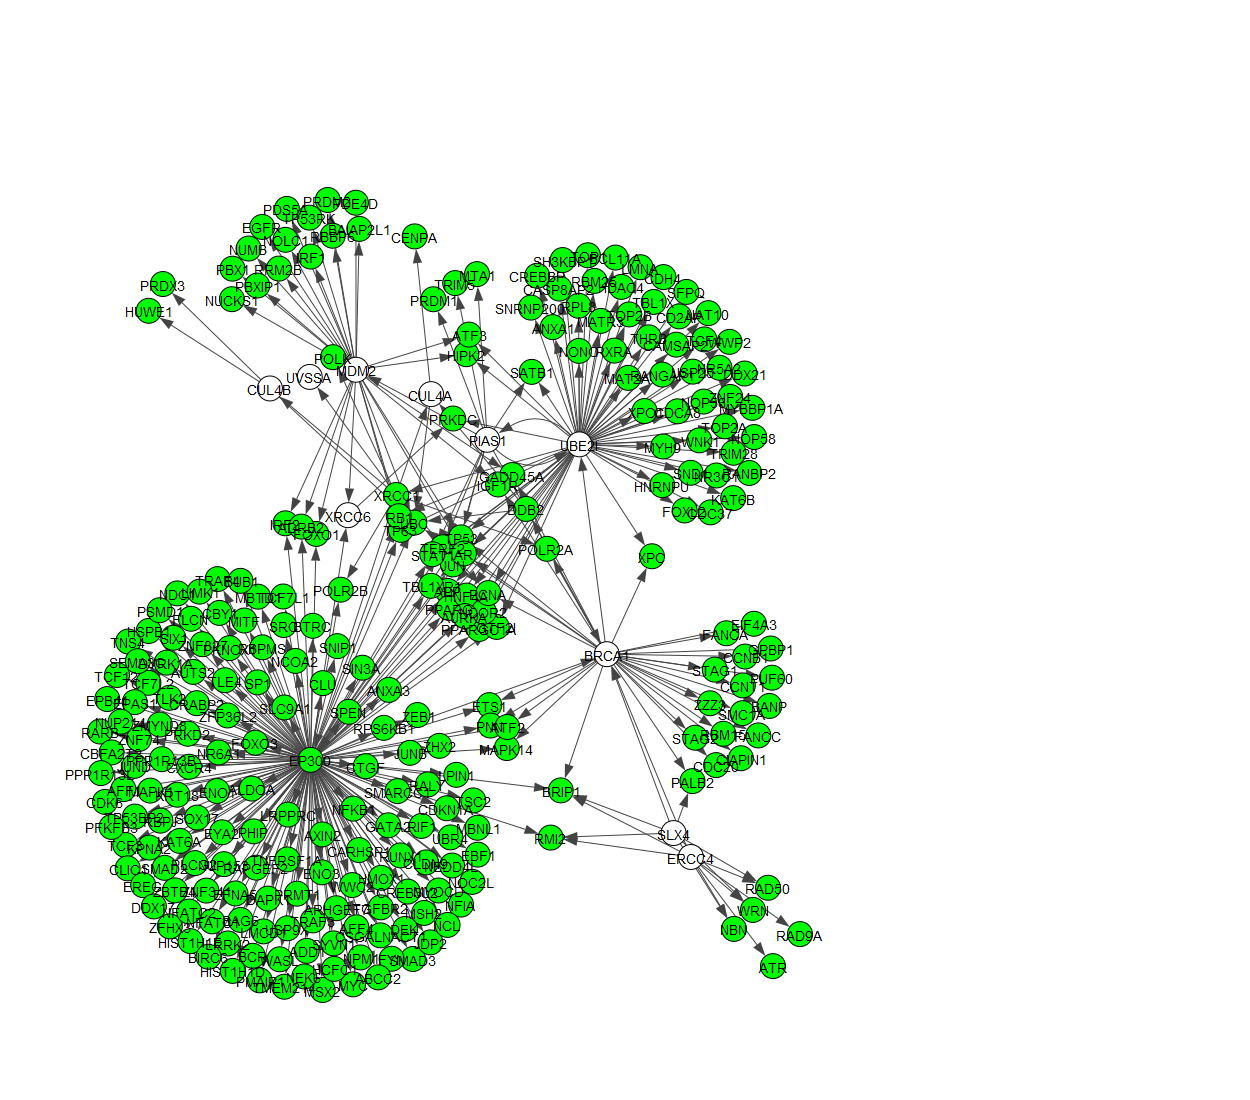

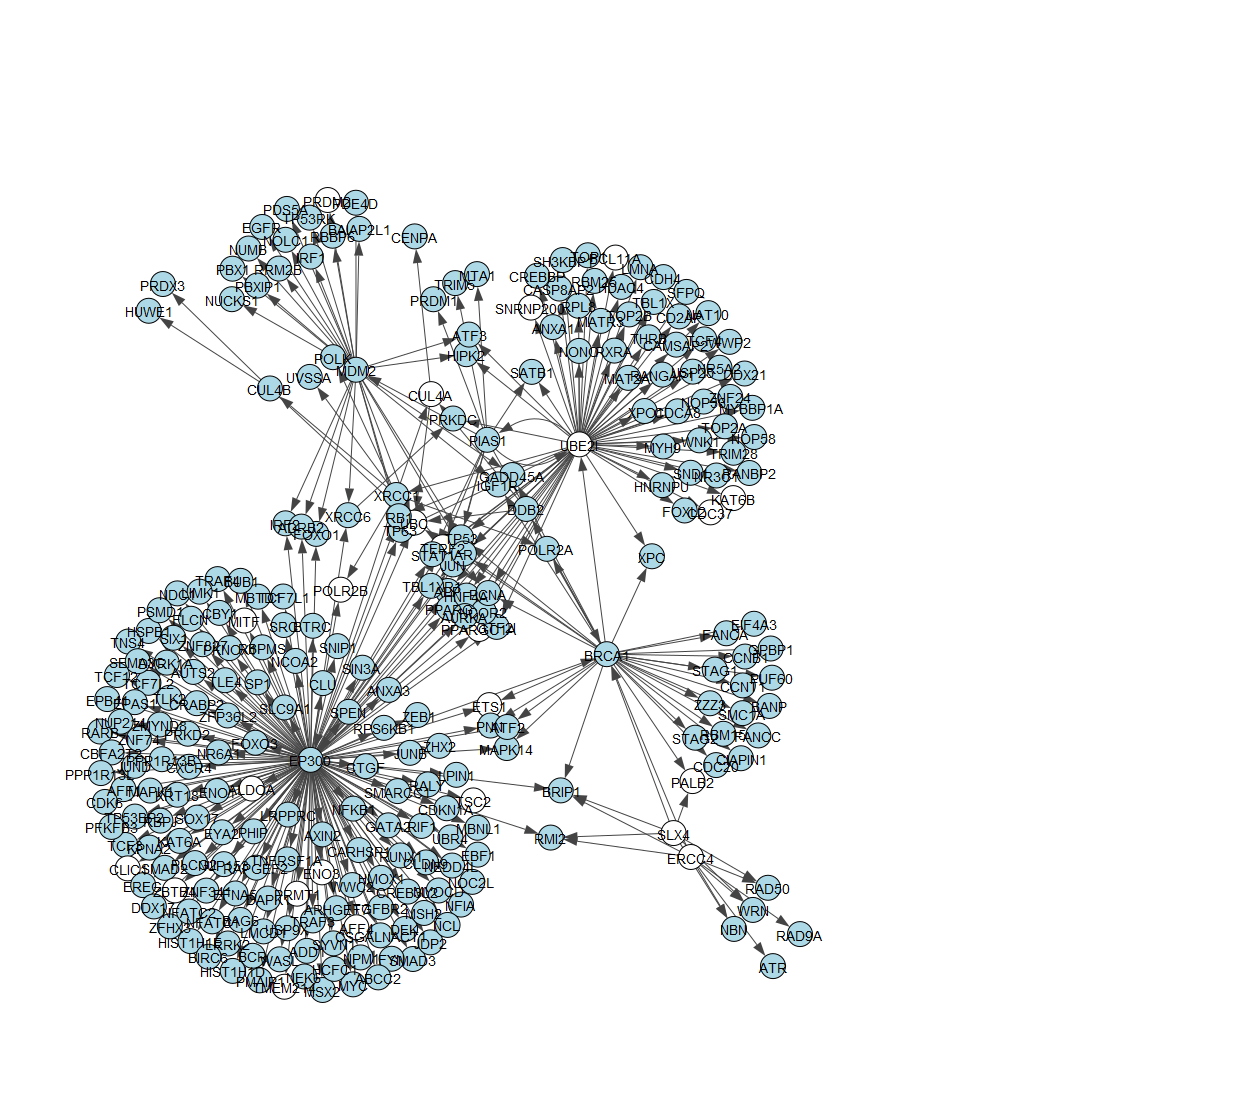

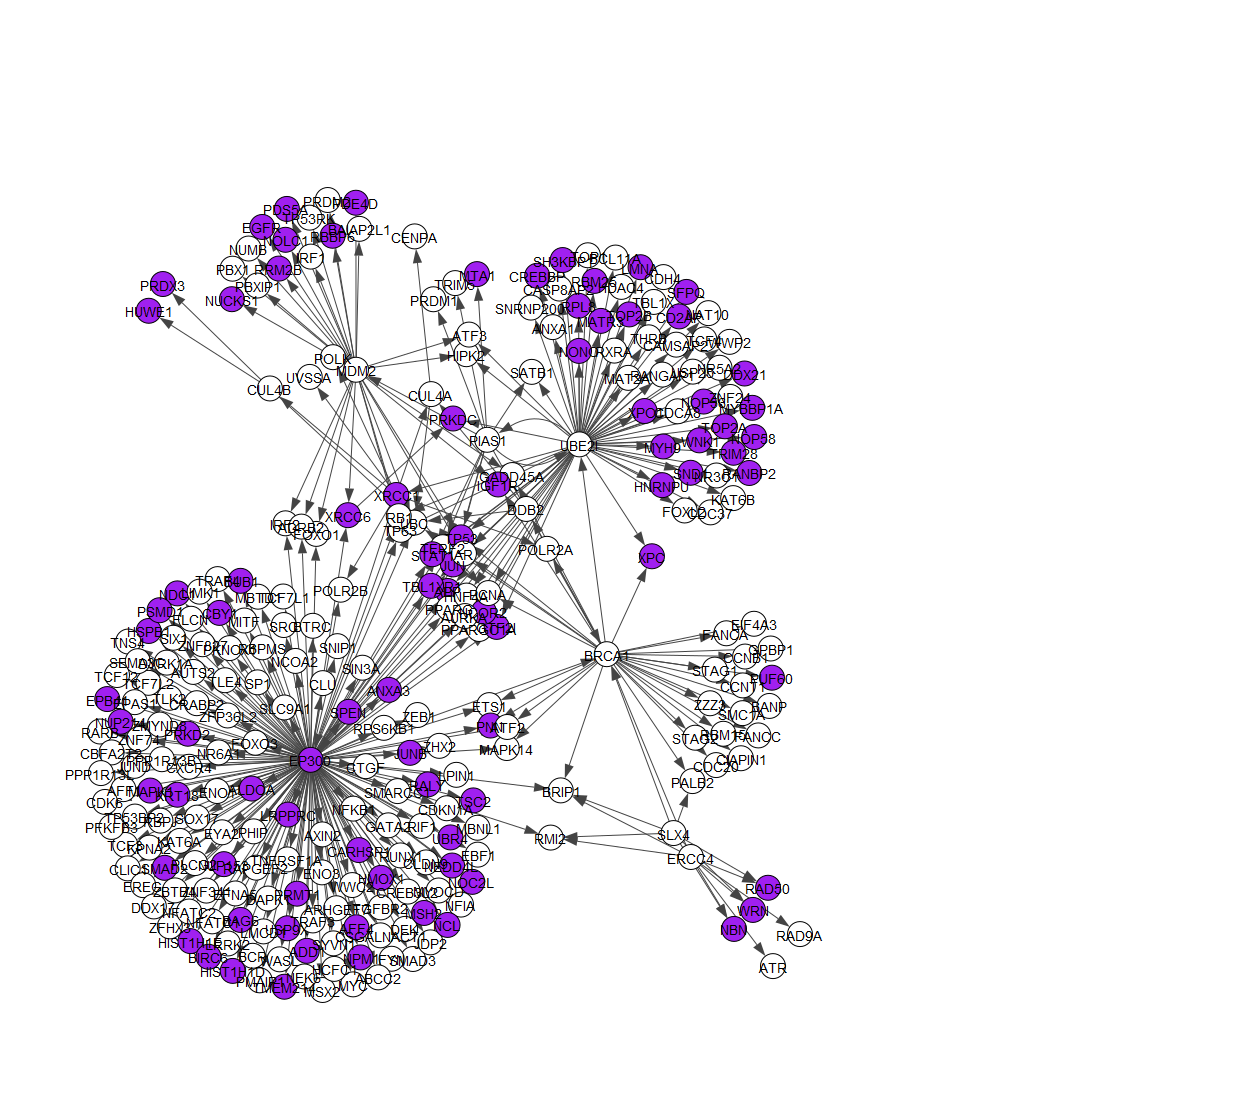

In [19]:
# view.render_graph(plus_neighbors)
paint_network_overtime(plus_neighbors, exp_data, ['red', 'green', 'lightblue', 'purple'], 'dna' )

In [20]:
# subgraph_gen.measured_networks_over_time(plus_neighbors, ['red', 'green', 'lightblue', 'purple'], 'dna')

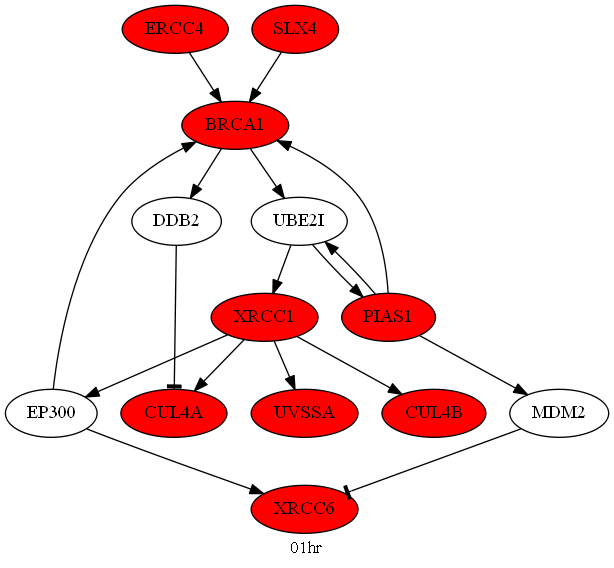

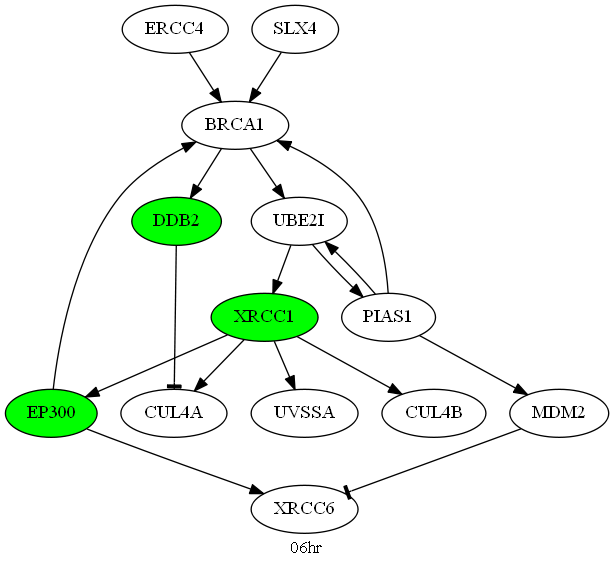

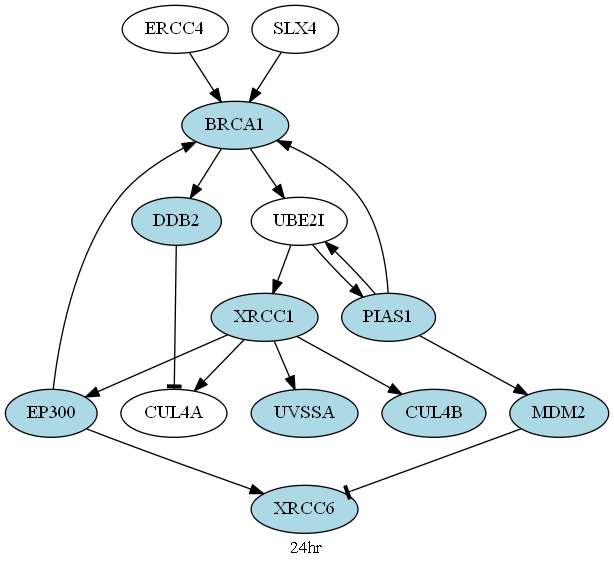

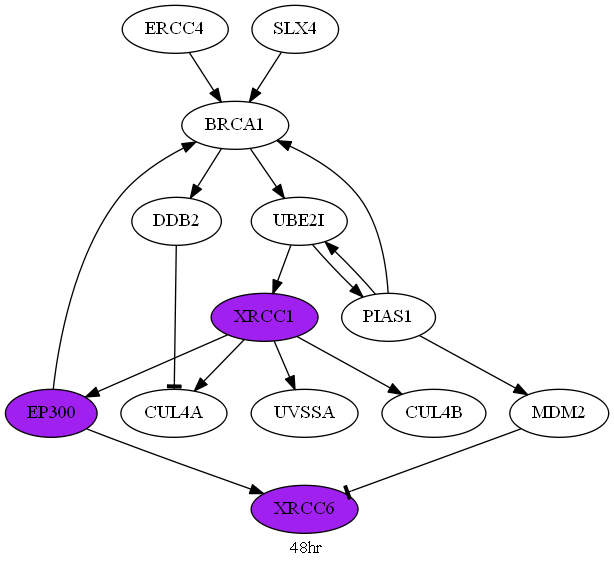

In [21]:
subgraph_gen.measured_networks_over_time(dna_network, ['red', 'green', 'lightblue', 'purple'], 'dna')

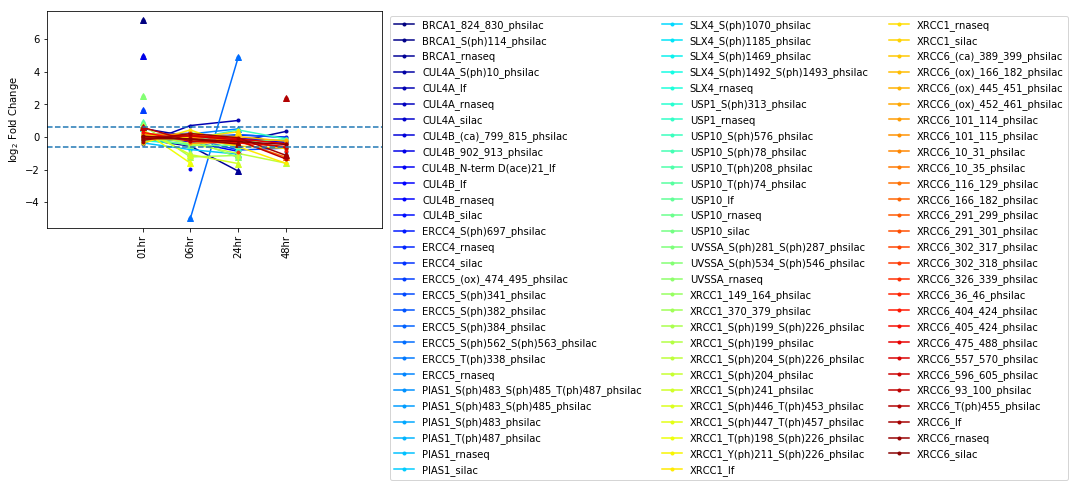

In [22]:
from magine.plotting.species_plotting import plot_list_of_genes
plot_list_of_genes(exp_data.data, dna_genes, save_name='dna_genes', image_format='png', plot_type='matplotlib')

In [23]:
time_1_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05,
                                       combined_score=0.0, 
                                       sample_id='01hr', 
                                       db=process_dbs,
                                      )
kinases = et.filter_dataframe(proteomics, 
                              p_value=0.05, 
                              sample_id='01hr', 
                              combined_score=0.0, 
                              db='KEA_2015')
kinases = et.remove_redundant(kinases)

display(kinases[print_cols].head(20))

Number of rows went from 24 to 24


term_name  combined_score  adj_p_value  n_genes  rank
189738      CDK2       106.17285  1.87846e-20       50     1
189739      CDK1        87.42101  4.84349e-17       43     2
189740     GSK3B        66.85140  3.53207e-13       39     3
189741   RPS6KA3        59.00151  1.51825e-11       29     4
189742    MAPK14        48.61824  1.82114e-10       30     5
189743    CSNK1E        34.37674  1.14288e-08       16     6
189744     MAPK1        32.49745  1.61044e-07       23     7
189745     MAPK8        30.12465  1.64446e-07       19     8
189746     PRKDC        25.77892  1.05376e-06       16     9
189747      AKT1        23.96818  1.35765e-06       17    10
189748      MTOR        19.60027  1.05376e-06       11    11
189749     PRKCA        19.28976  5.24412e-06       24    12
189750     MAPK9        18.73631  3.65619e-06       13    13
189751    MAPK10        18.56225  2.40904e-06       12    14
189752     PRKCB        16.67016  1.17515e-05       17    15
189753       ATM        13.57715  3.11138e-05       13    16
189754    PRKACA        12.61924  1.02503e-04       20    17
189755   CSNK2A1        10.68504  2.34938e-04       16    18
189756   CSNK2A2         6.64049  9.28741e-04       13    19
189757     CHEK1         6.15057  7.55250e-04       10    20

## Exploring other top hits from 1 hour

### Side effects of cisplatin
Chemotherapy-induced peripheral neuropathy. __[link](https://www.frontiersin.org/articles/10.3389/fnins.2017.00481/full)__
It is not well understood why cisplatin causes CIPN. Surprisely here, we see that Axon Guidance has a combined score of 20.5. 33 species are effected by cisplain that are linked with axon guidance. We are not neural experts and did not know that axon guidance was related to CIPN. Using MAGINE we were able to find ties between the two.

In [24]:
axon_guidance = et.term_to_genes(df=renamed_1hr, term='Axon guidance_Homo sapiens_R-HSA-422475')
print(axon_guidance)

set(['NRCAM', 'SRGAP2', 'CNKSR2', 'SPTBN2', 'SPTBN1', 'SHC1', 'TLN1', 'MAPK3', 'MARK3', 'CRMP1', 'CUL3', 'CLASP2', 'CLTCL1', 'SDCBP', 'RASGRF2', 'ARPC1A', 'AKAP9', 'IRS2', 'MET', 'BRAF', 'PTPRA', 'VWF'])


In [25]:
g = subgraph_gen.neighbors_of_list(axon_guidance, up_stream=True, down_stream=False, max_dist=1, 
                                   include_only=exp_data.sig_species_over_time['01hr']
                                  )
nt.render_graph(g)

In [26]:
chloride_transport = et.term_to_genes(df=renamed_1hr, term='chloride transport')
print(chloride_transport)
chl_trans = subgraph_gen.neighbors_of_list(chloride_transport, max_dist=2, 
#                                            include_only=exp_data.list_species
                                          )
nt.display_graph(chl_trans)

set(['ANO4', 'ANO5', 'ANO6', 'SLC26A8', 'CLIC4'])


# 6 hour time point

In [27]:
time_6_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05, 
                                       combined_score=0.0, 
                                       sample_id='06hr', 
                                       db=process_dbs
                                      )
slimmed = et.filter_similar_terms(time_6_hour_prot, threshold=.7)
display(slimmed[print_cols].head(25))

Number of rows went from 286 to 140


term_name  \
211872                                                                 mRNA splicing, via spliceosome   
210292                                                             mRNA processing_Mus musculus_WP310   
211873                           positive regulation of transcription from RNA polymerase II promoter   
210798                                                       Gene Expression_Homo sapiens_R-HSA-74160   
211874                                                                                   RNA splicing   
211875                                                                       mRNA export from nucleus   
211876                                                                                rRNA processing   
211877                                                                            protein sumoylation   
209818                                                            RNA transport_Homo sapiens_hsa03013   
209819                                                              Spliceosome_Homo sapiens_hsa03040   
210293  XPodNet - protein-protein interactions in the podocyte expanded by STRING_Mus musculus_WP2309   
211878                                                       cellular response to DNA damage stimulus   
210800               Activation of the AP-1 family of transcription factors_Homo sapiens_R-HSA-450341   
210294                                                     EGFR1 Signaling Pathway_Mus musculus_WP572   
211879                                                                                 RNA processing   
210295                                                             mRNA Processing_Homo sapiens_WP411   
210802                                                         SUMOylation_Homo sapiens_R-HSA-2990846   
211880                                                        regulation of cellular response to heat   
210805                                                          Cell Cycle_Homo sapiens_R-HSA-1640170   
210296                                                     TSLP Signaling Pathway_Homo sapiens_WP2203   
211882                                                                               response to cAMP   
210297                                                  TGF-beta Signaling Pathway_Homo sapiens_WP366   
211883                            nuclear-transcribed mRNA catabolic process, nonsense-mediated decay   
210808                                    Growth hormone receptor signaling_Homo sapiens_R-HSA-982772   
211884                                                                     osteoblast differentiation   

        combined_score  adj_p_value  n_genes  rank  
211872        87.39630  1.68470e-07       27     1  
210292        57.33101  6.86823e-10       39     1  
211873        56.40244  6.01018e-03       37     2  
210798        55.51078  5.92172e-09       91     1  
211874        50.63938  1.51055e-05       15     3  
211875        46.48645  2.37197e-05       15     4  
211876        45.42260  3.30413e-04       18     5  
211877        42.21652  6.08054e-05       12     6  
209818        41.82107  4.49532e-08       23     1  
209819        38.34541  4.79791e-08       20     2  
210293        36.00820  6.72206e-06       49     2  
211878        35.10147  2.39283e-03       16     7  
210800        33.43738  1.17648e-05        6     3  
210294        33.34797  1.16016e-05       19     3  
211879        32.99280  3.30413e-04       10     8  
210295        32.88463  6.72206e-06       17     4  
210802        31.74415  1.17648e-05       15     5  
211880        31.30815  6.65566e-04       11     9  
210805        29.16081  1.76416e-04       35     8  
210296        29.01737  2.09357e-05       10     5  
211882        28.20894  5.02902e-04        5    11  
210297        27.51889  2.27050e-05       16     6  
211883        26.71249  9.01020e-03       11    12  
210808        26.48213  1.50811e-04        7    11  
211884        26.03861  5.05284e-03 

In [28]:
shorten_names = {
    'protein sumoylation':'protein sumoylation',
    'Activation of the AP-1 family of transcription factors_Homo sapiens_R-HSA-450341' : 'AP1 activation',
    'response to cAMP' : 'response to cAMP',
                }
time_6_hour_prot['term_name'] = time_6_hour_prot['term_name'].replace(shorten_names)
term_net_6, mol_net_6 = nt.create_subnetwork(shorten_names.values(),
                                             time_6_hour_prot, 
                                             network,
                                             '06hr')


('response to cAMP', 5)
('protein sumoylation', 12)
('AP1 activation', 6)
Looking for direct edges


In [29]:
view.display_graph(term_net_6)

In [30]:
view.render_graph(mol_net_6)

In [31]:
time_24_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='24hr', db=process_dbs)
slimmed = et.filter_similar_terms(time_24_hour_prot, threshold=.5)
display(slimmed[print_cols].head(25))

Number of rows went from 400 to 148


term_name  \
234775                                              mRNA splicing, via spliceosome   
233501                                    Gene Expression_Homo sapiens_R-HSA-74160   
234776                                                             rRNA processing   
234777                                     regulation of cellular response to heat   
232930                                          mRNA processing_Mus musculus_WP310   
234778                                                    mRNA export from nucleus   
233504                                       Cell Cycle_Homo sapiens_R-HSA-1640170   
234780                                    positive regulation of apoptotic process   
234781                                                                RNA splicing   
234783                    regulation of alternative mRNA splicing, via spliceosome   
233514                               Infectious disease_Homo sapiens_R-HSA-5663205   
233518                                      SUMOylation_Homo sapiens_R-HSA-2990846   
232407                                         RNA transport_Homo sapiens_hsa03013   
234785                                                             mRNA processing   
233524                                         Apoptosis_Homo sapiens_R-HSA-109581   
232932                                Leptin signaling pathway_Homo sapiens_WP2034   
232933                        Integrated Breast Cancer Pathway_Homo sapiens_WP1984   
232934                               EGF/EGFR Signaling Pathway_Homo sapiens_WP437   
232935                                  EGFR1 Signaling Pathway_Mus musculus_WP572   
232657  Regulation of Telomerase_Homo sapiens_4dfe97ca-6195-11e5-8ac5-06603eb7f303   
234793                                                    neutrophil degranulation   
234794                                    cellular response to DNA damage stimulus   
234796                          positive regulation of protein export from nucleus   
234797                                    negative regulation of apoptotic process   
232936                    Integrated Pancreatic Cancer Pathway_Homo sapiens_WP2377   

        combined_score  adj_p_value  n_genes  rank  
234775       209.97956  3.35711e-21       53     1  
233501       102.13969  1.22082e-18      152     2  
234776        96.34318  4.91544e-10       33     2  
234777        84.29126  2.76957e-11       23     3  
232930        75.59573  1.40144e-13       57     1  
234778        73.91264  1.05520e-09       24     4  
233504        62.04892  6.09705e-10       62     5  
234780        53.81778  5.12368e-05       28     6  
234781        50.72409  2.16991e-06       19     7  
234783        45.26426  4.43884e-07       12     9  
233514        43.42330  1.14729e-07       41    15  
233518        41.46020  1.12733e-08       22    19  
232407        38.73844  9.32430e-08       28     2  
234785        38.27992  1.02509e-05       13    11  
233524        36.84090  1.68337e-07       26    25  
232932        34.39139  7.23525e-06       16     3  
232933        32.69125  9.26456e-06       23     4  
232934        32.54227  7.23525e-06       24     5  
232935        31.68754  1.16619e-05       24     6  
232657        30.69416  2.38116e-06       16     1  
234793        29.24433  2.07285e-02       36    19  
234794        28.06016  3.80525e-03       20    20  
234796        27.65680  9.93778e-04        6    22  
234797        27.29258  2.06839e-02       27    23  
232936        27.11383  6.14804e-05       24     7

In [32]:
shorten_names = {
                 'cellular response to DNA damage stimulus': 'DDR',
                 'negative regulation of apoptotic process': 'negative regulation of apoptosis',
                 'Apoptosis_Homo sapiens_R-HSA-109581' : 'Apoptosis',
                }
renamed = time_24_hour_prot.copy()
time_24_hour_prot['term_name'] = time_24_hour_prot['term_name'].replace(shorten_names)
term_net_24, mol_net_24 = nt.create_subnetwork(shorten_names.values(), time_24_hour_prot, network, '24hr', cytoscape_js=False)

('DDR', 20)
('negative regulation of apoptosis', 27)
('Apoptosis', 26)
Looking for direct edges


In [33]:
view.display_graph(term_net_24)

In [34]:
view.display_graph(mol_net_24, add_parent=True )

In [35]:
time_48_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='48hr', db=process_dbs)
slimmed = et.filter_similar_terms(time_48_hour_prot, threshold=.5)
display(slimmed[print_cols].head(25))

Number of rows went from 440 to 175


term_name  \
258340                                                                 mRNA splicing, via spliceosome   
258341                                                                       neutrophil degranulation   
257060                                                       Gene Expression_Homo sapiens_R-HSA-74160   
258342                                           mitochondrial ATP synthesis coupled proton transport   
257062                                               Metabolism of proteins_Homo sapiens_R-HSA-392499   
256490                                                             mRNA processing_Mus musculus_WP310   
258344                                                                          membrane organization   
258346                                                                       mRNA export from nucleus   
258347                                                       negative regulation of apoptotic process   
258348                                                                          RNA metabolic process   
258349                                                                         platelet degranulation   
257063                                                             Disease_Homo sapiens_R-HSA-1643685   
256492                                                    Electron Transport Chain_Homo sapiens_WP111   
258350                                                         ER to Golgi vesicle-mediated transport   
257065                                                           Hemostasis_Homo sapiens_R-HSA-109582   
256493  XPodNet - protein-protein interactions in the podocyte expanded by STRING_Mus musculus_WP2309   
257066                                          Vesicle-mediated transport_Homo sapiens_R-HSA-5653656   
255961                              Protein processing in endoplasmic reticulum_Homo sapiens_hsa04141   
255962                                                           Focal adhesion_Homo sapiens_hsa04510   
258352                                                                                   RNA splicing   
256206                   ErbB1 downstream signaling_Homo sapiens_30d60550-6192-11e5-8ac5-06603eb7f303   
258353                                                        regulation of cellular response to heat   
258354                                                                                rRNA processing   
256496                                       Integrated Pancreatic Cancer Pathway_Homo sapiens_WP2377   
258355                                                             cellular protein metabolic process   

        combined_score  adj_p_value  n_genes  rank  
258340       234.07970  6.84019e-24       56     1  
258341       180.85858  5.28249e-13       63     2  
257060        92.13838  4.73367e-17      147     3  
258342        90.68033  2.32850e-12       14     3  
257062        82.65462  2.49731e-15      108     5  
256490        81.17576  3.22397e-15       59     1  
258344        75.66202  7.65845e-07       31     5  
258346        67.10653  4.28107e-09       23     7  
258347        61.61440  7.82742e-05       34     8  
258348        57.79675  2.04280e-09       16     9  
258349        57.71895  2.57388e-07       23    10  
257063        56.88387  2.74013e-09       71     6  
256492        55.88341  6.72700e-11       25     3  
258350        52.61516  3.21715e-06       24    11  
257065        52.38823  1.78369e-09       60     8  
256493        52.00926  2.49502e-09       76     4  
257066        50.48990  3.56905e-09       55     9  
255961        47.31658  4.09787e-10       31     2  
255962        46.29476  1.48607e-09       33     3  
258352        44.60172  8.42417e-06       18    13  
256206        39.57586  5.38383e-08       22     1  
258353        35.93342  6.08002e-05       15    14  
258354        35.37760  5.07075e-04       22    15  
256496        35.35168  1.10841e-06       27     7  
258355        35.34121  7.28681e-04 

In [36]:
shorten_names = {
                 'membrane organization': 'Membrane Organization',
                 'negative regulation of apoptotic process': 'negative regulation of apoptosis',
                 'neutrophil degranulation' : 'neutrophil degranulation',
                }
time_48_hour_prot['term_name'] = time_48_hour_prot['term_name'].replace(shorten_names)
term_net_48, mol_net_48 = nt.create_subnetwork(shorten_names.values(), time_48_hour_prot, network, '48hr')

('Membrane Organization', 31)
('negative regulation of apoptosis', 34)
('neutrophil degranulation', 63)
Looking for direct edges


In [37]:
view.display_graph(term_net_48)

In [38]:
view.render_graph(mol_net_48, add_parent=True)